In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (ConfusionMatrixDisplay, accuracy_score,
                             confusion_matrix, log_loss)
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import log_loss
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

EL objetivo de este Notebook es la construcción de un modeo KNN, para comprobar su rendimiento para nuestros datos

In [3]:
path = 'C:/Users/cmari/Desktop/Quinto/Capgemini/AnemiaProject/data/raw/star_classification.csv'
data = pd.read_csv(path)

data.dropna(subset=['class'], inplace=True)

data = data[data['u']!=-9999]

X_data = data.drop('class', axis=1)
Y_data = data['class']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

numeric_features = ['redshift','plate', 'i', 'r', 'MJD', 'u', 'g']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

neighbors = [2, 3,4, 5,6, 10, 15]
log_losses = []
accuracies = []
for i in neighbors:
    print("Running Knn with "+str(i)+" neighbours")
    knn = KNeighborsClassifier(n_neighbors=i, weights='uniform', p=2)
    model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', knn)])

    model.fit(X_train, y_train)
  

    pred_prob_train = pd.DataFrame(model.predict_proba(X_train))
    loss = log_loss(y_train, pred_prob_train)
    log_losses.append(loss)
    print(f'Training log-loss : {loss}')
    
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_pred, y_test)
    accuracies.append(test_accuracy)
    print('Accuracy:', test_accuracy)


    #Predict on the test predictors, and save the probabilities to a csv file. 
    
    pred_prob_test = pd.DataFrame(model.predict_proba(X_test))


    pred_prob_test.head()
    

Running Knn with 2 neighbours
Training log-loss : 0.03717914663661746
Accuracy: 0.9429
Running Knn with 3 neighbours
Training log-loss : 0.054729128543225196
Accuracy: 0.95295
Running Knn with 4 neighbours
Training log-loss : 0.06575674625601872
Accuracy: 0.95
Running Knn with 5 neighbours
Training log-loss : 0.07396738989429326
Accuracy: 0.95335
Running Knn with 6 neighbours
Training log-loss : 0.08045961789527949
Accuracy: 0.951
Running Knn with 10 neighbours
Training log-loss : 0.09779117015531393
Accuracy: 0.95025
Running Knn with 15 neighbours
Training log-loss : 0.1107958324856031
Accuracy: 0.9474


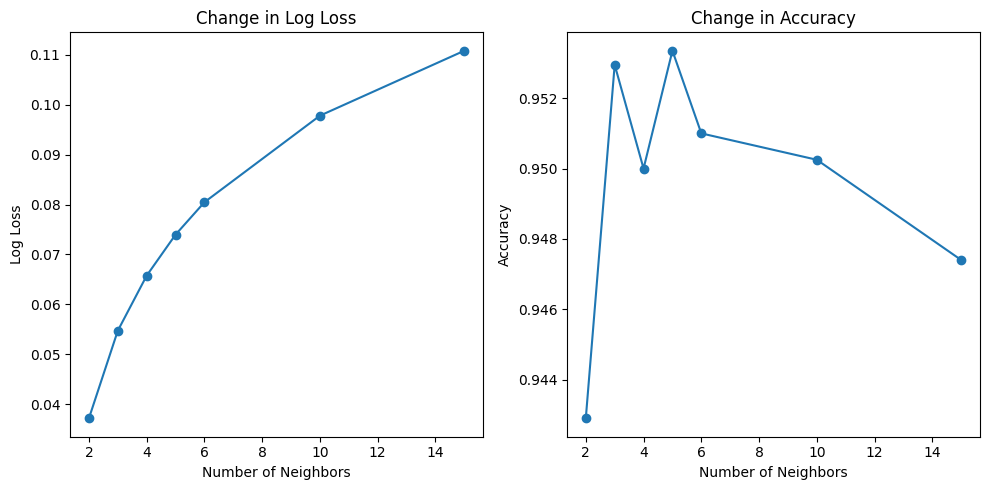

In [11]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(neighbors, log_losses, marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('Log Loss')
plt.title('Change in Log Loss')

plt.subplot(1, 2, 2)
plt.plot(neighbors, accuracies, marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Change in Accuracy')

plt.tight_layout()
plt.show()

Observamos que el mejor modelo lo obtenemos con k = 5. Nos quedaremos con dicho modelo.


In [18]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', p=2)
model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', knn)])
model.fit(X_train, y_train)
  

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['redshift', 'plate', 'i',
                                                   'r', 'MJD', 'u', 'g'])])),
                ('classifier', KNeighborsClassifier())])

In [19]:
predictions = model.predict(X_test)

# Evaluando el modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, predictions))
print("\nReporte de clasificación:")
print(classification_report(y_test, predictions))

Matriz de confusión:
[[11487   145   272]
 [  292  3497    21]
 [  202     1  4083]]

Reporte de clasificación:
              precision    recall  f1-score   support

      GALAXY       0.96      0.96      0.96     11904
         QSO       0.96      0.92      0.94      3810
        STAR       0.93      0.95      0.94      4286

    accuracy                           0.95     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.95      0.95      0.95     20000



Observamos que obtenemos buenas métricas para las clasificaciones. Además, obtenemos un tiempo de entrenamiento no demasiado elevado por lo que los costes computacionales no son elevados

KNeighborsClassifier()